# Batch Perceptron Algorithm (Algorithm 3 in Chapter 5) 

First lets get some sample data

In [2]:
import numpy as np

def generate_random_data_sample(sample_size, feature_dim, num_classes):
    # Create synthetic data using NumPy.
    Y = np.random.randint(size=(sample_size, 1), low=0, high=num_classes)

    # Make sure that the data is separable
    X = (np.random.randn(sample_size, feature_dim)+4) * (Y*1.5+1)
    X = X.astype(np.float32)
    # converting class 0 into the vector "1 0 0",
    # class 1 into vector "0 1 0", ...
    class_ind = [Y==class_number for class_number in range(num_classes)]
    Y = np.asarray(np.hstack(class_ind), dtype=np.float32)
    return X, Y

# Ensure we always get the same amount of randomness
#np.random.seed(51859)
np.random.seed(982168)

# Define the data dimensions
input_dim = 2
num_output_classes = 2

# Create the input variables denoting the features and the label data. Note: the input
# does not need additional info on number of observations (Samples) since CNTK first create only
# the network tooplogy first
mysamplesize = 128
features, labels = generate_random_data_sample(mysamplesize, input_dim, num_output_classes)



### FOR DEBUGGING
#mysamplesize = 2
#features = np.array( [[1,1],[8,8]] )
#labels = np.array( [[1.,0.],[0.,1.]])




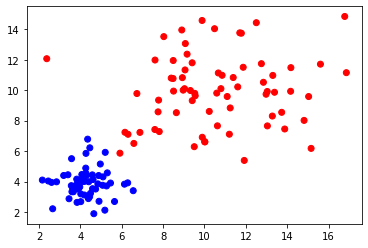

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# given this is a 2 class
colors = ['r' if l == 0 else 'b' for l in labels[:,0]]
plt.scatter(features[:,0], features[:,1], c=colors)
plt.show()

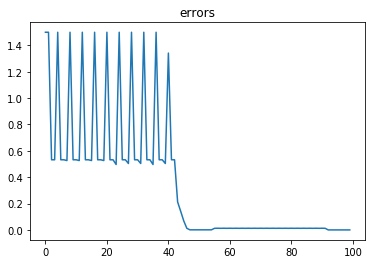

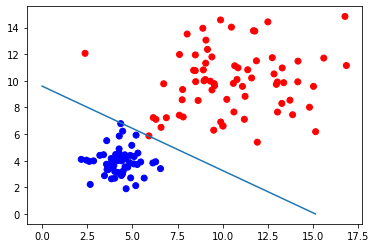

In [5]:


def batch_perceptron(features, labels, learn_factor=.1, max_iterations=100):

    (samplesize, input_dim) = features.shape
    #learning factor 
    learn_factor = .001

    #augment features with 1s [X 1]
    features_ones = np.append(features, np.full((samplesize,1), 1), 1)
    new_weights = np.ones(input_dim+1).reshape(input_dim+1,1)

    #map labels to an array of 0s and 1s 
    signed_labels = np.where(labels[:,0] == 0,0,1).reshape(samplesize,1)

    ## Start function 
    iteration = 0
    
    errors = np.zeros(max_iterations)    

    while iteration < max_iterations :    
        dot_products = features_ones.dot(new_weights)    
        predictions = np.where( dot_products < 0, 0, 1)        
        
        update = learn_factor * ((signed_labels - predictions)*features_ones).sum(0).reshape(input_dim+1,1)        
        new_weights = np.add(new_weights, update)        
        
        #logging
        errors[iteration] = np.absolute(update.sum(0)).item()        

        iteration = iteration+1        
        if(np.absolute(update.sum(0)).item() == 0):
            break
    return ( new_weights, errors)

( new_weights, errors) = batch_perceptron(features, labels, learn_factor=.1)

plt.figure()
plt.plot(errors)
plt.title('errors')

plt.figure()
colors = ['r' if l == 0 else 'b' for l in labels[:,0]]
plt.scatter(features[:,0], features[:,1], c=colors)
xint = -new_weights[2,0]/new_weights[0,0]
yint = -new_weights[2,0]/new_weights[1,0]
plt.plot((xint,0),(0,yint))

plt.show()

